In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor, BaggingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
data = pd.read_csv("ad_df.csv")
data.head()

,auction_id,timestamp,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,placement_language,website_id,referer_deep_three,ua_country,ua_os,ua_browser,ua_browser_version,ua_device,user_average_seconds_played,seconds_played
0,0008b046-b675-4f51-8ad6-fe06e5d81f8e,1517334694,25,198280,210671,7109.0,47216,fr,31838,de/golf/publish,ch,Windows,Microsoft Edge,16.0,PersonalComputer,NaN,9
1,00095bac-8fec-48c8-a17b-8f3878359e1d,1517270483,29,195285,210074,2270.0,77249,fr,46416,com/vinepair/articles,uk,Windows,Chrome,64.0,PersonalComputer,NaN,8
2,000c4c0c-0789-4e50-8ba6-a4be920ab482,1517339899,60,201430,214063,2643.0,25817,fr,20824,co.uk/hastingsobserver/news,uk,iOS,Facebook App,NaN,Tablet,NaN,1
3,000db509-3350-4cd9-b60a-d506fbd31f29,1517346542,29,198262,215400,2244.0,86526,fr,39091,com/slate/news-and-politics,us,Windows,Chrome,63.0,PersonalComputer,18.166666,1
4,001300de-8eda-480f-bec8-4b46ef6117f2,1517310926,29,174590,184750,3617.0,85350,fr,14796,co.uk/independent/arts-entertainment,uk,Windows,Firefox,58.0,PersonalComputer,NaN,0


In [ ]:
#auction_id: уникальный идентификатор просмотра
#timestamp: время, в которое показали видео в секундах
#creative_duration: общая длительность видео !
#creative_id: идентификатор рекламы
#campaign_id: идентификатор рекламной компании
#advertiser_id: идентификатор рекламодателя
#placement_id: идентификатор зоны на веб-странице, где было воспроизведено видео
#placement_language: язык зоны
#website_id: идентификатор сайта
#referer_deep_three: ссылка на адрес страницы, где воспроисводилось видео
#ua_country: страна пользователя !
#ua_os: ОС пользователя !
#ua_browser: браузер пользователя !
#ua_browser_version: версия браузера
#ua_device: используемый девайс !
#user_average_seconds_played: среднее время просмотра рекламы пользователем. Nan, если не смотрел до этого !
#seconds_played: Время просмотра рекламы. Таргетный признак

In [ ]:
data.describe()

,timestamp,creative_duration,creative_id,campaign_id,advertiser_id,placement_id,website_id,ua_browser_version,user_average_seconds_played,seconds_played
count,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,2.958556e+06,3.000000e+06,3.000000e+06,2.399960e+06,1.099705e+06,3.000000e+06
mean,1.517319e+09,2.910934e+01,1.990696e+05,2.119606e+05,4.665226e+03,5.790617e+04,3.218541e+04,3.662273e+01,1.004955e+01,6.967639e+00
std,2.396673e+04,2.109566e+01,7.107768e+03,7.470406e+03,2.919001e+03,1.791304e+04,1.003381e+04,2.644128e+01,9.053615e+00,9.054720e+00
min,1.517270e+09,5.000000e+00,1.213690e+05,1.243910e+05,6.250000e+02,1.874900e+04,1.432100e+04,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517300e+09,1.400000e+01,1.988620e+05,2.113480e+05,1.768000e+03,4.495100e+04,2.346300e+04,1.100000e+01,3.375000e+00,1.000000e+00
50%,1.517322e+09,2.800000e+01,2.012290e+05,2.137830e+05,3.774000e+03,6.194800e+04,3.247900e+04,4.100000e+01,8.500000e+00,4.000000e+00
75%,1.517339e+09,3.000000e+01,2.018620e+05,2.146310e+05,7.452000e+03,7.240800e+04,4.121400e+04,6.300000e+01,1.466667e+01,1.100000e+01
max,1.517357e+09,1.350000e+02,2.029200e+05,2.158850e+05,9.322000e+03,8.765900e+04,5.159200e+04,4.127000e+03,2.250000e+02,1.350000e+02


In [ ]:
len(data["advertiser_id"].unique())

226

In [ ]:
#удаление признаков, предположительно не нужных
dropFeat = ["timestamp", "auction_id", "ua_browser_version", "creative_id", "placement_id", "placement_language", "website_id", "referer_deep_three", "campaign_id", "advertiser_id"]

In [ ]:
#количество уникальных значений столбцов
catCol = ["ua_country", "ua_os", "ua_browser", "ua_device"]
dataDrop = data.drop(dropFeat, axis=1)
for i in catCol:
  print(i, len(data[i].unique()))

ua_country 130
ua_os 20
ua_browser 96
ua_device 5


In [ ]:
np.sum(dataDrop.isna())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
creative_duration,0
ua_country,14
ua_os,0
ua_browser,0
ua_device,198
user_average_seconds_played,1900295
seconds_played,0


In [ ]:
#изучение уникальных значений признака ua_country
country = dataDrop["ua_country"].value_counts() < (0.05 * len(dataDrop))
countLess = len(data["ua_country"].unique()) - np.sum(dataDrop["ua_country"].value_counts() < (0.05 * len(dataDrop)))
sum_ = 0
for i in country.index[countLess:]:
  sum_ += len(dataDrop[dataDrop["ua_country"] == i])
print("Всего стран:", len(data["ua_country"].unique()))
print("Кол-во стран с маленьким количеством данных:",  len(data["ua_country"].unique()) - countLess)
print("Процент данных с такими значениями стран:", sum_ / len(dataDrop))

Всего стран: 130
Кол-во стран с маленьким количеством данных: 123
Процент данных с такими значениями стран: 0.15791966666666668


In [ ]:
sumStay = len(data["ua_country"].unique()) - np.sum(dataDrop["ua_country"].value_counts() < 0.05 * len(dataDrop))
masOther = (dataDrop["ua_country"].value_counts()).index[sumStay:]
dataDrop.loc[::, "ua_country"] = dataDrop["ua_country"].replace(masOther, "other")

In [ ]:
#изучение уникальных значений признака ua_browser
country = dataDrop["ua_browser"].value_counts() < (0.05 * len(dataDrop))
countLess = len(data["ua_browser"].unique()) - np.sum(dataDrop["ua_browser"].value_counts() < (0.05 * len(dataDrop)))
sum_ = 0
for i in country.index[countLess:]:
  sum_ += len(dataDrop[dataDrop["ua_browser"] == i])
print("Всего браузеров:", len(data["ua_browser"].unique()))
print("Кол-во браузеров с маленьким количеством данных: ",  len(data["ua_browser"].unique()) - countLess)
print("Процент данных с такими значениями браузера: ", sum_ / len(dataDrop))

Всего браузеров: 96
Кол-во браузеров с маленьким количеством данных:  91
Процент данных с такими значениями браузера:  0.21033633333333332


In [ ]:
sumStay = len(data["ua_browser"].unique()) - np.sum(dataDrop["ua_browser"].value_counts() < 0.05 * len(dataDrop))
masOther = (dataDrop["ua_browser"].value_counts()).index[sumStay:]
dataDrop.loc[::, "ua_browser"] = dataDrop["ua_browser"].replace(masOther, "other")

In [ ]:
#изучение уникальных значений признака ua_os
country = dataDrop["ua_os"].value_counts() < (0.05 * len(dataDrop))
countLess = len(data["ua_os"].unique()) - np.sum(dataDrop["ua_os"].value_counts() < (0.05 * len(dataDrop)))
sum_ = 0
for i in country.index[countLess:]:
  sum_ += len(dataDrop[dataDrop["ua_os"] == i])
print("Всего ОС:", len(data["ua_os"].unique()))
print("Кол-во ОС с маленьким количеством данных: ",  len(data["ua_os"].unique()) - countLess)
print("Процент данных с такими значениями ОС: ", sum_ / len(dataDrop))

Всего ОС: 20
Кол-во ОС с маленьким количеством данных:  17
Процент данных с такими значениями ОС:  0.07131433333333333


In [ ]:
sumStay = len(data["ua_os"].unique()) - np.sum(dataDrop["ua_os"].value_counts() < 0.05 * len(dataDrop))
masOther = (dataDrop["ua_os"].value_counts()).index[sumStay:]
dataDrop.loc[::, "ua_os"] = dataDrop["ua_os"].replace(masOther, "other")

In [ ]:
#изучение уникальных значений признака ua_device
dataDrop["ua_device"].value_counts()

,count
ua_device,
Phone,1674503
PersonalComputer,1022438
Tablet,302771
ConnectedTv,90


In [ ]:
dataDrop = dataDrop[dataDrop["ua_device"] != "ConnectedTv"]

In [ ]:
#удаление пропусков, кроме user_average_seconds_played, так как их много в данном признаке
np.sum(dataDrop.isna())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
creative_duration,0
ua_country,14
ua_os,0
ua_browser,0
ua_device,198
user_average_seconds_played,1900242
seconds_played,0


In [ ]:
dataDrop = dataDrop.dropna(subset=['ua_country', 'ua_device'])

In [ ]:
#перевод строковых признаков в числовые
catCol = ["ua_country", "ua_os", "ua_browser", "ua_device"]
dataCat = pd.get_dummies(dataDrop, drop_first=True)
dataCat

,creative_duration,user_average_seconds_played,seconds_played,ua_country_de,ua_country_fr,ua_country_it,ua_country_jp,ua_country_other,ua_country_uk,ua_country_us,ua_os_Windows,ua_os_iOS,ua_os_other,ua_browser_Chrome Mobile,ua_browser_Facebook App,ua_browser_IE,ua_browser_Safari mobile,ua_browser_other,ua_device_Phone,ua_device_Tablet
0,25,NaN,9,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1,29,NaN,8,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
2,60,NaN,1,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True
3,29,18.166666,1,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4,29,NaN,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,30,NaN,19,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False
2999996,14,NaN,4,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False
2999997,15,NaN,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2999998,30,1.000000,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
dataCat.shape

(2999698, 20)

In [ ]:
dataCat = dataCat.drop(["user_average_seconds_played"], axis=1)

#разбиение на тренировочную и тестовую выборку так, чтобы в тесты не попали nan
test_size = 0.2
test_count = int(test_size * len(dataCat))

# Случайная выборка для тестовой выборки
data_test = dataCat.dropna().sample(n=test_count, random_state=42)

# Обучающая выборка - оставшиеся данные
data_train = dataCat.drop(data_test.index)

In [ ]:
data_train_clean = data_train.copy()
len(data_train_clean)

2399759

<Axes: xlabel='creative_duration', ylabel='Count'>

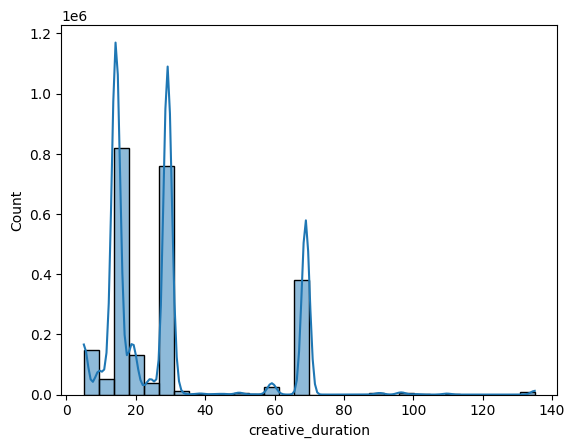

In [ ]:
#изучение creative_duration
sns.histplot(data_train_clean['creative_duration'], bins=30, kde=True)

<Axes: ylabel='creative_duration'>

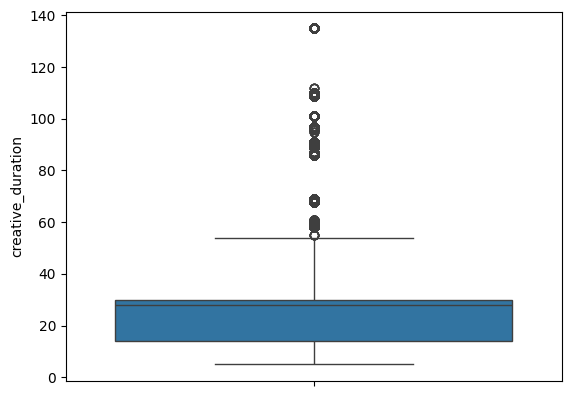

In [ ]:
sns.boxplot(data_train_clean['creative_duration'])

In [ ]:
data_train_clean = data_train_clean[zscore(data_train_clean["creative_duration"]) <= 3]
data_train_clean = data_train_clean[zscore(data_train_clean["seconds_played"]) <= 3]

In [ ]:
#обучение модели
scaler = MinMaxScaler()
X_train = data_train_clean.drop(["seconds_played"], axis=1)
y_train = data_train_clean["seconds_played"] ** 1

data_test_clean = data_test[zscore(data_test["seconds_played"]) <= 3]
X_test = data_test_clean.drop(["seconds_played"], axis=1)
y_test = data_test_clean["seconds_played"] ** 1

listSc = ["creative_duration"]
X_train.loc[::, listSc] = scaler.fit_transform(X_train[listSc])
X_test.loc[::, listSc] = scaler.fit_transform(X_test[listSc])

<ipython-input-26-69a299fe67f5>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.23255814 0.63953488 0.27906977 ... 0.11627907 0.29069767 0.11627907]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[::, listSc] = scaler.fit_transform(X_train[listSc])
<ipython-input-26-69a299fe67f5>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.07692308 0.49230769 0.14615385 ... 0.06923077 0.48461538 0.49230769]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[::, listSc] = scaler.fit_transform(X_test[listSc])


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [ ]:
print("R2-score: ", r2_score(y_test, predict))
print("MSE: ", mean_squared_error(y_test, predict))
print("MAE: ", mean_absolute_error(y_test, predict))

R2-score:  0.023154923410117934
MSE:  50.28028568206665
MAE:  5.544890163290489


In [31]:
randFR = RandomForestRegressor(n_estimators=10, random_state=40)
randFR.fit(X_train, y_train)
predict = randFR.predict(X_test)

In [32]:
print("R2-score: ", r2_score(y_test, predict))
print("MSE: ", mean_squared_error(y_test, predict))
print("MAE: ", mean_absolute_error(y_test, predict))

R2-score:  -0.11044522546185243
MSE:  57.15696839607449
MAE:  5.8024783756491916


In [33]:
modelBagg = BaggingRegressor(LinearRegression(), n_estimators=10, max_samples=0.8, max_features=0.8)
modelBagg.fit(X_train, y_train)
predict = modelBagg.predict(X_test)

In [34]:
print("R2-score: ", r2_score(y_test, predict))
print("MSE: ", mean_squared_error(y_test, predict))
print("MAE: ", mean_absolute_error(y_test, predict))

R2-score:  0.023117572849550405
MSE:  50.282208194551714
MAE:  5.564947554088066


In [35]:
modelAdaBoost = AdaBoostRegressor(LinearRegression())
modelAdaBoost.fit(X_train, y_train)
predict = modelAdaBoost.predict(X_test)

In [36]:
print("R2-score: ", r2_score(y_test, predict))
print("MSE: ", mean_squared_error(y_test, predict))
print("MAE: ", mean_absolute_error(y_test, predict))

R2-score:  -0.03686644334669942
MSE:  53.36971259313446
MAE:  6.179920064760068


In [40]:
params_grid = {'n_estimators': [10,20,30],
  'learning_rate': [0.1, 0.2, 0.3],
  'max_depth': [2,3,4]}
grid = GridSearchCV(GradientBoostingRegressor(
    random_state=29),
    params_grid,
    verbose=4,
    scoring="r2",
    cv=2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


KeyboardInterrupt: 

In [37]:
modelGradBoost = GradientBoostingRegressor(n_estimators=30, learning_rate=0.3, random_state=29, max_depth=4)
modelGradBoost.fit(X_train, y_train)
predict = modelGradBoost.predict(X_test)

In [38]:
print("R2-score: ", r2_score(y_test, predict))
print("MSE: ", mean_squared_error(y_test, predict))
print("MAE: ", mean_absolute_error(y_test, predict))

R2-score:  0.041160659296125224
MSE:  49.353492308213795
MAE:  5.51410207856409


In [39]:
#влияние признаков на результирующий признак
a = {value: index for index, value in enumerate(model.coef_)}
sorted_keys = sorted(a.keys(), reverse=True)
sorted_values = [a[key] for key in sorted_keys]
for i, j in enumerate(sorted_values):
  print(X_train.columns[j], round(sorted_keys[i], 3))

creative_duration 4.142
ua_country_us 0.665
ua_country_uk 0.546
ua_country_other 0.54
ua_browser_other 0.282
ua_os_iOS 0.214
ua_country_fr 0.181
ua_browser_Chrome Mobile 0.145
ua_browser_IE 0.005
ua_browser_Safari mobile -0.266
ua_country_it -0.571
ua_browser_Facebook App -0.688
ua_country_de -0.832
ua_device_Tablet -0.977
ua_os_Windows -1.49
ua_os_other -1.494
ua_device_Phone -1.876
ua_country_jp -2.431
